In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [11]:
from scipy.spatial.distance import cosine

In [2]:
movies = pd.read_csv('../Datasets/ml_small/movies.csv')
ratings = pd.read_csv('../Datasets/ml_small/ratings.csv')
tags = pd.read_csv('../Datasets/ml_small/tags.csv')
links = pd.read_csv('../Datasets/ml_small/links.csv')

In [4]:
display(movies.head())
display(ratings.head())

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [5]:
display(tags.head())
display(links.head())

,userId,movieId,tag,timestamp
0,2,60756,funny,1445714994
1,2,60756,Highly quotable,1445714996
2,2,60756,will ferrell,1445714992
3,2,89774,Boxing story,1445715207
4,2,89774,MMA,1445715200


,movieId,imdbId,tmdbId
0,1,114709,862.0
1,2,113497,8844.0
2,3,113228,15602.0
3,4,114885,31357.0
4,5,113041,11862.0


In [6]:
datasets = [movies,ratings,tags,links]

for col in datasets:
    display(col.isnull().sum().max())

0

0

0

8

In [7]:
ratings_df = pd.merge(ratings[['userId','movieId','rating']], movies[['movieId', 'title']],
                   how='left',left_on ='movieId' ,right_on = 'movieId')

In [8]:
ratings_df.head()

,userId,movieId,rating,title
0,1,1,4.0,Toy Story (1995)
1,1,3,4.0,Grumpier Old Men (1995)
2,1,6,4.0,Heat (1995)
3,1,47,5.0,Seven (a.k.a. Se7en) (1995)
4,1,50,5.0,"Usual Suspects, The (1995)"


In [15]:
mat_ratings_df = ratings_df.pivot_table(columns=['movieId'],index=['userId'],values='rating')
mat_ratings_df = mat_ratings_df.fillna(0)

In [16]:
mat_ratings = mat_ratings_df.as_matrix()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.


In [17]:
# Creating user similarity matrix

m, n = mat_ratings.shape

users_mat = np.zeros((m,m))

for i in range(m):
    for j in range(m):
        if i != j:
            users_mat[i][j] = (1 - cosine(mat_ratings[i,:],mat_ratings[j,:]))
        else:
            users_mat[i][j] = 0
            
users_df = pd.DataFrame(users_mat, columns= mat_ratings_df.index, index= mat_ratings_df.index)

In [18]:
users_df.head()

userId,1,2,3,4,5,6,7,8,9,10,...,601,602,603,604,605,606,607,608,609,610
userId,,,,,,,,,,,,,,,,,,,,,
1,0.000000,0.027283,0.059720,0.194395,0.129080,0.128152,0.158744,0.136968,0.064263,0.016875,...,0.080554,0.164455,0.221486,0.070669,0.153625,0.164191,0.269389,0.291097,0.093572,0.145321
2,0.027283,0.000000,0.000000,0.003726,0.016614,0.025333,0.027585,0.027257,0.000000,0.067445,...,0.202671,0.016866,0.011997,0.000000,0.000000,0.028429,0.012948,0.046211,0.027565,0.102427
3,0.059720,0.000000,0.000000,0.002251,0.005020,0.003936,0.000000,0.004941,0.000000,0.000000,...,0.005048,0.004892,0.024992,0.000000,0.010694,0.012993,0.019247,0.021128,0.000000,0.032119
4,0.194395,0.003726,0.002251,0.000000,0.128659,0.088491,0.115120,0.062969,0.011361,0.031163,...,0.085938,0.128273,0.307973,0.052985,0.084584,0.200395,0.131746,0.149858,0.032198,0.107683
5,0.129080,0.016614,0.005020,0.128659,0.000000,0.300349,0.108342,0.429075,0.000000,0.030611,...,0.068048,0.418747,0.110148,0.258773,0.148758,0.106435,0.152866,0.135535,0.261232,0.060792


In [22]:
# Finding top n similar users

def topn_similar_users(uid,n):
    users = users_df.loc[uid,:].sort_values(ascending = False)
    topn_users = users.iloc[:n,]
    topn_users = topn_users.rename('score')
    print ("Similar users to userId:",uid) 
    return pd.DataFrame(topn_users)

In [23]:
topn_similar_users(uid=15,n=10)

Similar users to userId: 15


,score
userId,
247,0.445646
279,0.398025
434,0.381976
141,0.362031
399,0.357811
254,0.345901
352,0.343894
62,0.336772
561,0.335740


In [25]:
# Creating movie similarity matrix

movies_mat = np.zeros((n,n))

for i in range(n):
    for j in range(n):
        if i != j:
            movies_mat[i][j] = ( 1 - cosine(mat_ratings[:,i], mat_ratings[:,j]))
        else:
            movies_mat[i][j] = 0

movies_df = pd.DataFrame(movies_mat, columns= mat_ratings_df.columns, index= mat_ratings_df.columns)

In [ ]:
#movies_df.to_csv('../Datasets/ml_small/movies__mat_df.csv')
#movies_df = pd.read_csv('../Datasets/ml_small/movies_mat_df_csv')

In [26]:
# Finding similar movies

def topn_similar_movies(mid,n):
    movies_rat = movies_df.loc[mid,:].sort_values(ascending = False)
    topn_movies = pd.DataFrame(movies_rat.iloc[:n,])
    topn_movies['index1'] = topn_movies.index 
    topn_movies['index1'] = topn_movies['index1'].astype('int64') 
    topn_movies = pd.merge(topn_movies,movies[['movieId','title']],how = 'left', left_on ='index1' ,right_on = 'movieId') 
    print ("Movies similar to movie id:",mid,",",movies['title'][movies['movieId'] == mid].to_string(index=False),",are") 
    del topn_movies['index1'] 
    return topn_movies




In [28]:
print (topn_similar_movies(mid=589,n=15))

Movies similar to movie id: 589 , Terminator 2: Judgment Day (1991) ,are
         589  movieId                                              title
0   0.719983      480                               Jurassic Park (1993)
1   0.695724     1240                             Terminator, The (1984)
2   0.659827      110                                  Braveheart (1995)
3   0.645603      592                                      Batman (1989)
4   0.637561      457                               Fugitive, The (1993)
5   0.630092      377                                       Speed (1994)
6   0.618530     1196  Star Wars: Episode V - The Empire Strikes Back...
7   0.611164      380                                   True Lies (1994)
8   0.610284      296                                Pulp Fiction (1994)
9   0.600886      356                                Forrest Gump (1994)
10  0.599390     1210  Star Wars: Episode VI - Return of the Jedi (1983)
11  0.596632     1200                              

### Collaborative filtering

In [29]:
#Let

A = mat_ratings_df.values

In [30]:
mat_ratings_df.shape

(610, 9724)

In [35]:
A.shape

(610, 9724)

In [36]:
W = A>0.5 
W[W==True]=1 
W[W==False]=0 
W = W.astype(np.float64,copy=False)

In [37]:
W_pred = A<0.5 
W_pred[W_pred==True]=1 
W_pred[W_pred==False]=0 
W_pred = W_pred.astype(np.float64,copy=False) 
np.fill_diagonal(W_pred,val=0)

In [38]:
# Parameters 
m,n = A.shape 
n_iterations = 200 
n_factors = 100 
lmbda = 0.1

In [39]:
X = 5 * np.random.rand(m,n_factors) 
Y = 5* np.random.rand(n_factors,n)

In [40]:
def get_error(A, X, Y, W):
    return np.sqrt(np.sum((W * (A - np.dot(X, Y)))**2)/np.sum(W))

In [41]:
errors = [] 
for itr in range(n_iterations):
    X = np.linalg.solve(np.dot(Y,Y.T)+ lmbda * np.eye(n_factors),np.dot(Y,A.T)).T 
    Y = np.linalg.solve(np.dot(X.T,X)+ lmbda * np.eye(n_factors),np.dot(X.T,A)) 
    if itr%10 == 0: 
        print(itr," iterations completed","RMSError value is:",get_error(A,X,Y,W)) 
    errors.append(get_error(A,X,Y,W))

0  iterations completed RMSError value is: 3.1876000819607033
10  iterations completed RMSError value is: 1.6142041391137414
20  iterations completed RMSError value is: 1.6051729631803568
30  iterations completed RMSError value is: 1.6017290693706736
40  iterations completed RMSError value is: 1.5997848858419694
50  iterations completed RMSError value is: 1.5985360628078602
60  iterations completed RMSError value is: 1.5976739352475111
70  iterations completed RMSError value is: 1.5970447115121127
80  iterations completed RMSError value is: 1.5965649228596202
90  iterations completed RMSError value is: 1.5961857027945188
100  iterations completed RMSError value is: 1.595876573629519
110  iterations completed RMSError value is: 1.5956177974907835
120  iterations completed RMSError value is: 1.5953964064442139
130  iterations completed RMSError value is: 1.5952038421567576
140  iterations completed RMSError value is: 1.5950343933565019
150  iterations completed RMSError value is: 1.59488

RMSError of rated movies:  1.5943478318298063


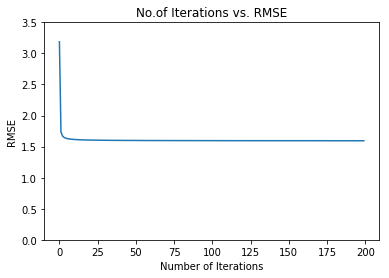

In [42]:
print ("RMSError of rated movies: ",get_error(A,X,Y,W)) 
plt.plot(errors); 
plt.ylim([0, 3.5]); 
plt.xlabel("Number of Iterations");plt.ylabel("RMSE") 
plt.title("No.of Iterations vs. RMSE") 
plt.show()

In [43]:
A_hat = np.dot(X,Y)

In [45]:
def print_recommovies(uid=315,n_movies=15,pred_mat = A_hat,wpred_mat = W_pred ): 
    pred_recos = pred_mat*wpred_mat 
    pd_predrecos = pd.DataFrame(pred_recos,index =mat_ratings_df.index ,columns= mat_ratings_df.columns ) 
    pred_ratings = pd_predrecos.loc[uid,:].sort_values(ascending = False) 
    pred_topratings = pred_ratings[:n_movies,] 
    pred_topratings = pred_topratings.rename('pred_ratings')   
    pred_topratings = pd.DataFrame(pred_topratings) 
    pred_topratings['index1'] = pred_topratings.index 
    pred_topratings['index1'] = pred_topratings['index1'].astype('int64') 
    pred_topratings = pd.merge(pred_topratings,movies[['movieId','title']],how = 'left',left_on ='index1' ,right_on = 'movieId') 
    del pred_topratings['index1']     
    print ("\nTop",n_movies,"movies predicted for the user:",uid," based on collaborative filtering\n") 
    return pred_topratings 
 
predmtrx = print_recommovies(uid=355,n_movies=10,pred_mat=A_hat,wpred_mat=W_pred) 
print (predmtrx)


Top 10 movies predicted for the user: 355  based on collaborative filtering

   pred_ratings  movieId                                              title
0      0.860390     2571                                 Matrix, The (1999)
1      0.851495      260          Star Wars: Episode IV - A New Hope (1977)
2      0.644006     1196  Star Wars: Episode V - The Empire Strikes Back...
3      0.641186     1291          Indiana Jones and the Last Crusade (1989)
4      0.578606     2028                         Saving Private Ryan (1998)
5      0.578029     1676                           Starship Troopers (1997)
6      0.572817     2115        Indiana Jones and the Temple of Doom (1984)
7      0.566608     1210  Star Wars: Episode VI - Return of the Jedi (1983)
8      0.561446     2617                                  Mummy, The (1999)
9      0.561143     2396                         Shakespeare in Love (1998)
